In [41]:
import os
import glob
import gensim
import matplotlib as plt
%matplotlib inline
mallet_home = '/home/zafrik/Documents/mallet-2.0.8'
mallet_path = os.path.join(mallet_home, 'bin', 'mallet')
mallet_path

'/home/zafrik/Documents/mallet-2.0.8/bin/mallet'

In [4]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import tempfile
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

Folder "/tmp" will be used to save temporary dictionary and corpus.


In [5]:
dictionary = gensim.corpora.Dictionary.load(os.path.join(TEMP_FOLDER, 'ca_corpus.dict'))
corpus = gensim.corpora.MmCorpus(os.path.join(TEMP_FOLDER, 'ca_corpus.mm'))

2018-05-17 10:52:59,413 : INFO : loading Dictionary object from /tmp/ca_corpus.dict
2018-05-17 10:52:59,416 : INFO : loaded /tmp/ca_corpus.dict
2018-05-17 10:52:59,419 : INFO : loaded corpus index from /tmp/ca_corpus.mm.index
2018-05-17 10:52:59,420 : INFO : initializing cython corpus reader from /tmp/ca_corpus.mm
2018-05-17 10:52:59,421 : INFO : accepted corpus with 35 documents, 544 features, 3068 non-zero entries


In [6]:
texts = [[(dictionary[bag[0]], bag[1]) for bag in doc] for doc in corpus]

In [97]:
mallet = gensim.models.wrappers.ldamallet.LdaMallet(mallet_path, corpus, id2word=dictionary, num_topics=2, iterations=50)

2018-05-17 13:58:48,436 : INFO : serializing temporary corpus to /tmp/2b7253_corpus.txt
2018-05-17 13:58:48,465 : INFO : converting temporary corpus to MALLET format with /home/zafrik/Documents/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/2b7253_corpus.txt --output /tmp/2b7253_corpus.mallet
2018-05-17 13:58:48,764 : INFO : training MALLET LDA with /home/zafrik/Documents/mallet-2.0.8/bin/mallet train-topics --input /tmp/2b7253_corpus.mallet --num-topics 2  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/2b7253_state.mallet.gz --output-doc-topics /tmp/2b7253_doctopics.txt --output-topic-keys /tmp/2b7253_topickeys.txt --num-iterations 50 --inferencer-filename /tmp/2b7253_inferencer.mallet --doc-topics-threshold 0.0
2018-05-17 13:58:50,844 : INFO : loading assigned topics from /tmp/2b7253_state.mallet.gz


In [98]:
mallet.print_topics()

2018-05-17 13:58:56,792 : INFO : topic #0 (25.000): 0.065*"academic" + 0.060*"member" + 0.057*"university" + 0.029*"freedom" + 0.029*"responsibility" + 0.021*"party" + 0.019*"obligation" + 0.019*"professional" + 0.018*"doe" + 0.018*"legal"
2018-05-17 13:58:56,795 : INFO : topic #1 (25.000): 0.117*"freedom" + 0.074*"academic" + 0.025*"faculty" + 0.021*"research" + 0.021*"teaching" + 0.019*"exercise" + 0.018*"duty" + 0.018*"search" + 0.017*"free" + 0.014*"agree"


[(0,
  '0.065*"academic" + 0.060*"member" + 0.057*"university" + 0.029*"freedom" + 0.029*"responsibility" + 0.021*"party" + 0.019*"obligation" + 0.019*"professional" + 0.018*"doe" + 0.018*"legal"'),
 (1,
  '0.117*"freedom" + 0.074*"academic" + 0.025*"faculty" + 0.021*"research" + 0.021*"teaching" + 0.019*"exercise" + 0.018*"duty" + 0.018*"search" + 0.017*"free" + 0.014*"agree"')]

In [99]:
mallet.show_topics(formatted=False)

[(0,
  [('academic', 0.06451612903225806),
   ('member', 0.05965532479010163),
   ('university', 0.05700397702165267),
   ('freedom', 0.029164825452938577),
   ('responsibility', 0.029164825452938577),
   ('party', 0.0207688908528502),
   ('obligation', 0.019443216968625717),
   ('professional', 0.019001325673884226),
   ('doe', 0.018117543084401236),
   ('legal', 0.017675651789659744)]),
 (1,
  [('freedom', 0.11720067453625632),
   ('academic', 0.07377740303541315),
   ('faculty', 0.025295109612141653),
   ('research', 0.021079258010118045),
   ('teaching', 0.02065767284991568),
   ('exercise', 0.01897133220910624),
   ('duty', 0.01770657672849916),
   ('search', 0.01770657672849916),
   ('free', 0.016863406408094434),
   ('agree', 0.01433389544688027)])]

In [100]:
with open(mallet.fdoctopics(), 'r') as fp:
    for line in fp:
        print(line.strip())

0	0	0.5228758169934641	0.477124183006536
1	1	0.48427672955974843	0.5157232704402516
2	2	0.5203252032520326	0.4796747967479675
3	3	0.39204545454545453	0.6079545454545454
4	4	0.5483870967741935	0.45161290322580644
5	5	0.4857142857142857	0.5142857142857142
6	6	0.5732484076433121	0.4267515923566879
7	7	0.4925373134328358	0.5074626865671642
8	8	0.4843304843304843	0.5156695156695157
9	9	0.44505494505494503	0.554945054945055
10	10	0.42857142857142855	0.5714285714285714
11	11	0.4240506329113924	0.5759493670886076
12	12	0.45544554455445546	0.5445544554455446
13	13	0.38317757009345793	0.616822429906542
14	14	0.41	0.59
15	15	0.44375	0.55625
16	16	0.5390946502057613	0.4609053497942387
17	17	0.45121951219512196	0.5487804878048781
18	18	0.43733333333333335	0.5626666666666666
19	19	0.5978260869565217	0.40217391304347827
20	20	0.6124031007751938	0.3875968992248062
21	21	0.5172413793103449	0.4827586206896552
22	22	0.5180722891566265	0.4819277108433735
23	23	0.5220588235294118	0.47794117647058826
24	24	

In [101]:
with open(mallet.ftopickeys(), 'r') as fp:
    for line in fp:
        print(line.strip())

0	25	academic member university responsibility freedom party obligation professional doe legal article result research association consistent principle knowledge community essential make
1	25	freedom academic faculty research teaching exercise search duty free agree carry member prescribed part manner doe material university society scholarly


In [102]:
ca_look_up = []
for f in sorted(glob.glob("TEXT/*.txt")):
    tf = open(f).read()
    if len(tf) != 1:
        ca_look_up.append(f[8:-4])
        #print("\t",len(finaldoc)," words processed")
    #else:
        #print(" skipped to due to empty file")    

In [103]:
#Building dataseries for the plots

X = []
Y = []

with open(mallet.fdoctopics(), 'r') as fp:
    for line in fp:
        entries = line.split('\t')
        X.append(entries[2])
        Y.append(entries[3])


/home/zafrik/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


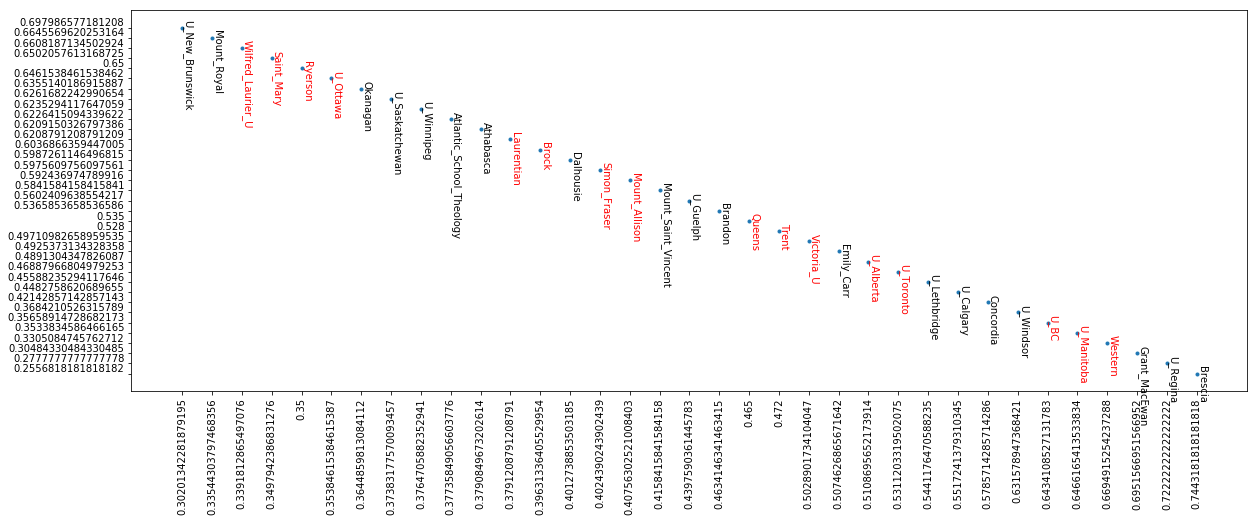

In [96]:
fig = plt.pyplot.figure(figsize=(20,7))

plt.pyplot.plot(X,Y,".")

ax = fig.add_subplot(111)

for l in range(0,len(corpus)):
    if l in [4,9,10,14,15,16,17,18,19,20,24,26,29,32,33,34]:
        #lib specific cas
        ax.annotate('%s' %ca_look_up[l] ,xy=(X[l],Y[l]),rotation = -90,color="red")
    else:
        ax.annotate('%s' %ca_look_up[l] ,xy=(X[l],Y[l]),rotation = -90, color="black")
    
#for i,j in zip(X,Y):
#    ax.annotate('%s)' %j, xy=(i,j), xytext=(30,0))
#    ax.annotate('(%s,' %i, xy=(i,j))

#plt.pyplot.axhline(0, color='grey')
#plt.pyplot.axvline(0, color='grey')

#plt.pyplot.axis([0, 10, 0, 100])
plt.pyplot.axis()
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()